In [2]:
from sklearn import datasets

In [16]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=False)

In [17]:
data_iris = datasets.load_iris()
print(data_iris['DESCR'])


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [20]:
from sklearn.model_selection import train_test_split
X_bc = data_breast_cancer.data
y_bc = data_breast_cancer.target
X_bc_needed = X_bc[:, [4, 5]]

X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc_needed, y_bc, test_size=0.2, random_state=42)

X_i = data_iris.data
y_i = data_iris.target
X_i_needed = X_i[:, [0, 1]]
X_i_train, X_i_test, y_i_train, y_i_test = train_test_split(X_i_needed, y_i, test_size=0.2, random_state=42)

In [21]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([ ('linear_svc', LinearSVC(C=1.0, loss='hinge', random_state=42))])
svm_clf.fit(X_bc_train, y_bc_train)
svm_clf2 = Pipeline([('scaler', StandardScaler()), ('linear_svc', LinearSVC(C=1.0, loss='hinge', random_state=42))])
svm_clf2.fit(X_bc_train, y_bc_train)



C:\Users\wiech\PycharmProjects\um\.venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\wiech\PycharmProjects\um\.venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(loss='hinge', random_state=42))])

In [23]:
from sklearn.metrics import accuracy_score
acc_bc_no_scale_train = accuracy_score(y_bc_train, svm_clf.predict(X_bc_train))
acc_bc_no_scale_test = accuracy_score(y_bc_test, svm_clf.predict(X_bc_test))
acc_bc_scale_train = accuracy_score(y_bc_train, svm_clf2.predict(X_bc_train))
acc_bc_scale_test = accuracy_score(y_bc_test, svm_clf2.predict(X_bc_test))

In [24]:
svm_clf.fit(X_i_train, y_i_train)
svm_clf2.fit(X_i_train, y_i_train)

C:\Users\wiech\PycharmProjects\um\.venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\wiech\PycharmProjects\um\.venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\wiech\PycharmProjects\um\.venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(loss='hinge', random_state=42))])

In [25]:
acc_i_no_scale_train = accuracy_score(y_i_train, svm_clf.predict(X_i_train))
acc_i_no_scale_test = accuracy_score(y_i_test, svm_clf.predict(X_i_test))
acc_i_scale_train = accuracy_score(y_i_train, svm_clf2.predict(X_i_train))
acc_i_scale_test = accuracy_score(y_i_test, svm_clf2.predict(X_i_test))

In [26]:
acc_bc_list = [acc_bc_no_scale_train, acc_bc_no_scale_test, acc_bc_scale_train, acc_bc_scale_test]
acc_i_list = [acc_i_no_scale_train, acc_i_no_scale_test, acc_i_scale_train, acc_i_scale_test]

import pickle
with open('bc_acc.pkl', 'wb') as f:
    pickle.dump(acc_bc_list, f)
    
with open('iris_acc.pkl', 'wb') as f:
    pickle.dump(acc_i_list, f)

In [27]:
print(acc_bc_list)
print(acc_i_list)

[0.6725274725274726, 0.6842105263157895, 0.7956043956043956, 0.8245614035087719]
[0.7083333333333334, 0.7333333333333333, 0.775, 0.9]


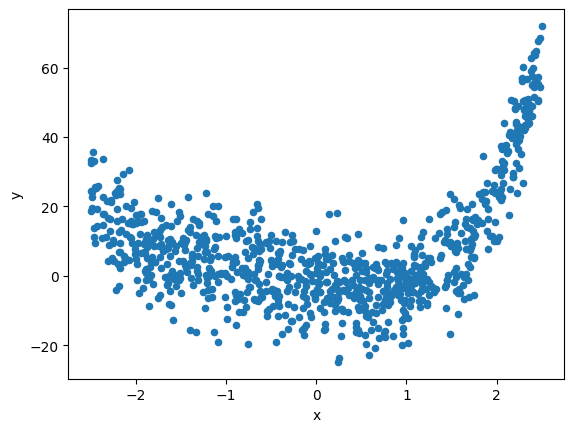

In [31]:
import pandas as pd
size = 900
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

df = pd.DataFrame({'x': X, 'y': y})
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import mean_squared_error

polynomial_svr_clf = Pipeline([
("poly_features", PolynomialFeatures(degree=4,
include_bias=False)),
("svr", LinearSVR())])

polynomial_svr_clf.fit(X_train, y_train)
y_train_pred_linear = polynomial_svr_clf.predict(X_train)
y_test_pred_linear = polynomial_svr_clf.predict(X_test)
mse_train_linear = mean_squared_error(y_train, y_train_pred_linear)
mse_test_linear = mean_squared_error(y_test, y_test_pred_linear)
print(mse_train_linear, mse_test_linear)

63.83503236958682 56.76774874655042


C:\Users\wiech\PycharmProjects\um\.venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\wiech\PycharmProjects\um\.venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [34]:
svr_poly = SVR(kernel='poly', degree=4)
svr_poly.fit(X_train, y_train)

y_train_pred_svr_poly = svr_poly.predict(X_train)
y_test_pred_svr_poly = svr_poly.predict(X_test)
mse_train_svr_poly = mean_squared_error(y_train, y_train_pred_svr_poly)
mse_test_svr_poly = mean_squared_error(y_test, y_test_pred_svr_poly)
print(mse_train_svr_poly, mse_test_svr_poly)

112.47150843727383 92.92932586337703


In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {
"coef0": [0.1, 1, 10],
"C" : [0.1, 1, 10]
}
search = GridSearchCV(svr_poly,
param_grid,
scoring="neg_mean_squared_error")
search.fit(X.reshape(-1, 1), y)
print(f"Cross-validated accuracy = {search.best_score_}")
print(search.best_params_)


Cross-validated accuracy = -63.04354354823744
{'C': 10, 'coef0': 10}


In [38]:
svr_poly_opt = SVR(kernel='poly', degree=4, C=10, coef0=10)
svr_poly_opt.fit(X_train, y_train)
y_train_pred_svr_poly_opt = svr_poly_opt.predict(X_train)
y_test_pred_svr_poly_opt = svr_poly_opt.predict(X_test)
mse_train_svr_poly_opt = mean_squared_error(y_train, y_train_pred_svr_poly_opt)
mse_test_svr_poly_opt = mean_squared_error(y_test, y_test_pred_svr_poly_opt)
print(mse_train_svr_poly_opt, mse_test_svr_poly_opt)

63.76820373459228 57.31750900008348


In [39]:
mse_list = [mse_train_linear, mse_test_linear, mse_train_svr_poly_opt, mse_test_svr_poly_opt]
print(mse_list)

[63.83503236958682, 56.76774874655042, 63.76820373459228, 57.31750900008348]


In [40]:
with open("reg_mse.pkl", "wb") as f:
    pickle.dump(mse_list, f)